In [39]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [2]:
data = pd.read_csv('/content/p5F.csv')
del data['Unnamed: 0']

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
PassengerType    0
dtype: int64

0    548
1    339
Name: Survived, dtype: int64

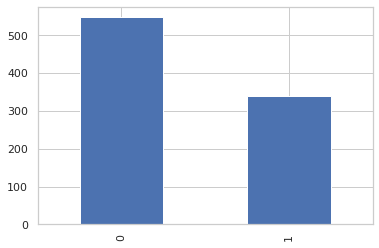

In [4]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

**BALANCED**

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,PassengerType
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,445.220970,0.382187,2.314543,0.649380,0.525366,0.383315,32.071532,1.363021,1.103720,3.697858
std,256.758344,0.486196,0.833309,0.477433,1.104669,0.807466,49.708282,0.636642,0.430834,0.745964
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000,1.000000,4.000000
50%,445.000000,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,1.000000,1.000000,4.000000
75%,666.500000,1.000000,3.000000,1.000000,1.000000,0.000000,30.847900,2.000000,1.000000,4.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,3.000000,4.000000,5.000000


In [9]:
xdata = data.drop('Survived', axis = 1)
ydata = data.Survived

In [18]:
# define algorithm
clf = DecisionTreeClassifier()
gnb = GaussianNB()
lda = LDA()
KNN = KNeighborsClassifier()

holdout starts. define target/class column

In [10]:
xtrain, xtest, ytrain, ytest, = train_test_split(xdata, ydata, test_size = 0.3, random_state = 1)

In [11]:
CLF_pred = clf.fit(xtrain, ytrain).predict(xtest)
GNB_pred = gnb.fit(xtrain, ytrain).predict(xtest)
LDA_pred = lda.fit(xtrain, ytrain).predict(xtest)
KNN_pred = KNN.fit(xtrain, ytrain).predict(xtest)

**holdout starts**

In [21]:
#menggunakan akurasi
print("CLF")
ypredclf = clf.fit(xtrain, ytrain).predict(xtest)
print("Akurasi CLF Tree : ", metrics.accuracy_score(ytest, ypredclf)*100)

print("\nGaussianNaiveBeyes")
ypredgnb = gnb.fit(xtrain, ytrain).predict(xtest)
print("Akurasi Gaussian Naive Beyes : ", metrics.accuracy_score(ytest, ypredgnb)*100)

print("\nLDA")
lda = lda.fit(xtrain, ytrain)
ypredlda = lda.fit(xtrain, ytrain).predict(xtest)
print("Akurasi LDA Tree : ", metrics.accuracy_score(ytest, ypredlda)*100)

print("\nKNN")
ypredknn = KNN.fit(xtrain, ytrain).predict(xtest)
print("Akurasi KNN Tree : ", metrics.accuracy_score(ytest, ypredknn)*100)

CLF
Akurasi CLF Tree :  73.03370786516854

GaussianNaiveBeyes
Akurasi Gaussian Naive Beyes :  81.27340823970037

LDA
Akurasi LDA Tree :  83.52059925093633

KNN
Akurasi KNN Tree :  64.7940074906367


In [22]:
#Confussion Matrix
print("CLF")
print(pd.crosstab(ytest, CLF_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("GNB")
print(pd.crosstab(ytest, GNB_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("LDA")
print(pd.crosstab(ytest, LDA_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))
print("")
print("KNN")
print(pd.crosstab(ytest, KNN_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True))

CLF
Predicted    0    1  All
Actual                  
0          129   41  170
1           31   66   97
All        160  107  267

GNB
Predicted    0   1  All
Actual                 
0          147  23  170
1           27  70   97
All        174  93  267

LDA
Predicted    0   1  All
Actual                 
0          149  21  170
1           23  74   97
All        172  95  267

KNN
Predicted    0   1  All
Actual                 
0          134  36  170
1           58  39   97
All        192  75  267


In [30]:
print("CLF")
print(classification_report(ytest, CLF_pred))
print("\nGNB")
print(classification_report(ytest, GNB_pred))
print("\nLDA")
print(classification_report(ytest, LDA_pred))
print("\nKNN")
print(classification_report(ytest, KNN_pred))

CLF
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       170
           1       0.62      0.68      0.65        97

    accuracy                           0.73       267
   macro avg       0.71      0.72      0.71       267
weighted avg       0.74      0.73      0.73       267


GNB
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       170
           1       0.75      0.72      0.74        97

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267


LDA
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       170
           1       0.78      0.76      0.77        97

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267


KNN


In [40]:
print("CLF")
print("accuracy: ", accuracy_score(ytest, CLF_pred))
print("precision: ", precision_score(ytest, CLF_pred))
print("recall: ", recall_score(ytest, CLF_pred))
print("\nGNB")
print("accuracy: ", accuracy_score(ytest, GNB_pred))
print("precision: ", precision_score(ytest, GNB_pred))
print("recall: ", recall_score(ytest, GNB_pred))
print("\nLDA")
print("accuracy: ", accuracy_score(ytest, LDA_pred))
print("precision: ", precision_score(ytest, LDA_pred))
print("recall: ", recall_score(ytest, LDA_pred))
print("\nKNN")
print("accuracy: ", accuracy_score(ytest, KNN_pred))
print("precision: ", precision_score(ytest, KNN_pred))
print("recall: ", recall_score(ytest, KNN_pred))

CLF
accuracy:  0.7303370786516854
precision:  0.616822429906542
recall:  0.6804123711340206

GNB
accuracy:  0.8127340823970037
precision:  0.7526881720430108
recall:  0.7216494845360825

LDA
accuracy:  0.8352059925093633
precision:  0.7789473684210526
recall:  0.7628865979381443

KNN
accuracy:  0.6479400749063671
precision:  0.52
recall:  0.4020618556701031


**holdout ends, cross-val (k-fold) starts**

In [14]:
#CLF
print("CLF")
scores_accuracy_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_clf.mean(), scores_accuracy_clf.std()))

scores_precision_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_clf.mean(), scores_precision_clf.std()))

scores_recall_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_clf.mean(), scores_recall_clf.std()))

scores_f1_clf = cross_val_score(clf, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_clf.mean(), scores_f1_clf.std()))

#GNB
print("\nGNB")
scores_accuracy_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_gnb.mean(), scores_accuracy_gnb.std()))

scores_precision_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_gnb.mean(), scores_precision_gnb.std()))

scores_recall_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_gnb.mean(), scores_recall_gnb.std()))

scores_f1_gnb = cross_val_score(gnb, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_gnb.mean(), scores_f1_gnb.std()))

#LDA
print("\nLDA")
scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

#KNN
print("\nKNN")
scores_accuracy_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))

scores_precision_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))

scores_recall_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))

scores_f1_KNN = cross_val_score(KNN, xdata, ydata, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))

CLF
Rata-rata nilai akurasi: 0.73 (+/- 0.08)
Rata-rata nilai precision macro: 0.72 (+/- 0.07)
Rata-rata nilai recall macro: 0.71 (+/- 0.08)
Rata-rata nilai f1 macro: 0.70 (+/- 0.08)

GNB
Rata-rata nilai akurasi: 0.80 (+/- 0.02)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.79 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)

LDA
Rata-rata nilai akurasi: 0.80 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.78 (+/- 0.03)
Rata-rata nilai f1 macro: 0.79 (+/- 0.03)

KNN
Rata-rata nilai akurasi: 0.49 (+/- 0.07)
Rata-rata nilai precision macro: 0.53 (+/- 0.11)
Rata-rata nilai recall macro: 0.49 (+/- 0.03)
Rata-rata nilai f1 macro: 0.45 (+/- 0.03)


In [15]:
#CLF
print("CLF")
scores_accuracy_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_clf.mean(), scores_accuracy_clf.std()))

scores_precision_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_clf.mean(), scores_precision_clf.std()))

scores_recall_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_clf.mean(), scores_recall_clf.std()))

scores_f1_clf = cross_val_score(clf, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_clf.mean(), scores_f1_clf.std()))

#GNB
print("\nGNB")
scores_accuracy_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_gnb.mean(), scores_accuracy_gnb.std()))

scores_precision_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_gnb.mean(), scores_precision_gnb.std()))

scores_recall_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_gnb.mean(), scores_recall_gnb.std()))

scores_f1_gnb = cross_val_score(gnb, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_gnb.mean(), scores_f1_gnb.std()))

#LDA
print("\nLDA")
scores_accuracy_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_lda.mean(), scores_accuracy_lda.std()))

scores_precision_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_lda.mean(), scores_precision_lda.std()))

scores_recall_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_lda.mean(), scores_recall_lda.std()))

scores_f1_lda = cross_val_score(lda, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_lda.mean(), scores_f1_lda.std()))

#KNN
print("\nKNN")
scores_accuracy_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_KNN.mean(), scores_accuracy_KNN.std()))

scores_precision_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_KNN.mean(), scores_precision_KNN.std()))

scores_recall_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_KNN.mean(), scores_recall_KNN.std()))

scores_f1_KNN = cross_val_score(KNN, xdata, ydata, cv=5, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_KNN.mean(), scores_f1_KNN.std()))

CLF
Rata-rata nilai akurasi: 0.74 (+/- 0.09)
Rata-rata nilai precision macro: 0.76 (+/- 0.03)
Rata-rata nilai recall macro: 0.71 (+/- 0.10)
Rata-rata nilai f1 macro: 0.70 (+/- 0.13)

GNB
Rata-rata nilai akurasi: 0.80 (+/- 0.03)
Rata-rata nilai precision macro: 0.79 (+/- 0.03)
Rata-rata nilai recall macro: 0.78 (+/- 0.03)
Rata-rata nilai f1 macro: 0.78 (+/- 0.03)

LDA
Rata-rata nilai akurasi: 0.79 (+/- 0.02)
Rata-rata nilai precision macro: 0.79 (+/- 0.02)
Rata-rata nilai recall macro: 0.77 (+/- 0.02)
Rata-rata nilai f1 macro: 0.78 (+/- 0.02)

KNN
Rata-rata nilai akurasi: 0.54 (+/- 0.09)
Rata-rata nilai precision macro: 0.58 (+/- 0.11)
Rata-rata nilai recall macro: 0.51 (+/- 0.03)
Rata-rata nilai f1 macro: 0.46 (+/- 0.03)
